# Clasterization

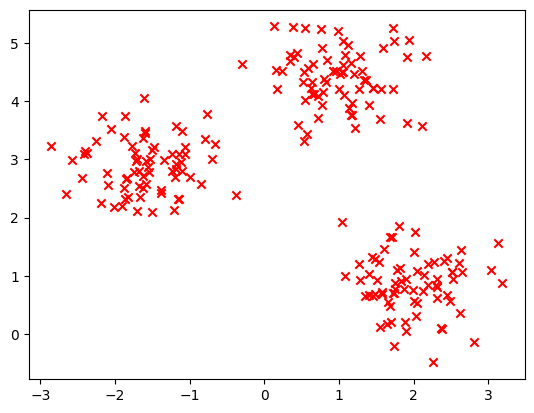

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
 
X, y= make_blobs(n_samples=210, centers=3, n_features=2, cluster_std=0.5, shuffle=True,random_state=0)
plt.scatter(X[:,0], X[:,1], c='red', marker='x')

### Zad 1

98.78710787930851


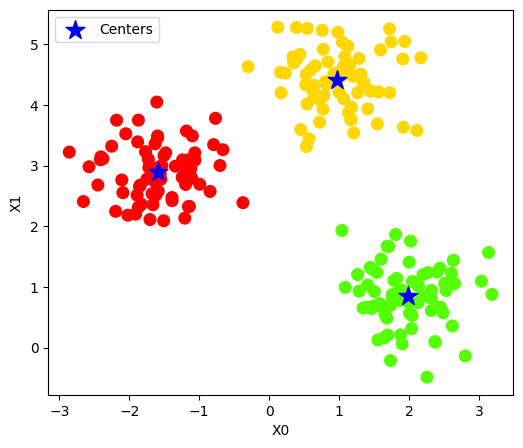

In [60]:
km = KMeans(n_clusters=3, init='random', n_init = 'auto', max_iter = 300, tol = 0.0001, random_state = 0)
km.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

print(km.inertia_)

### Zad 2

3027.123447596183


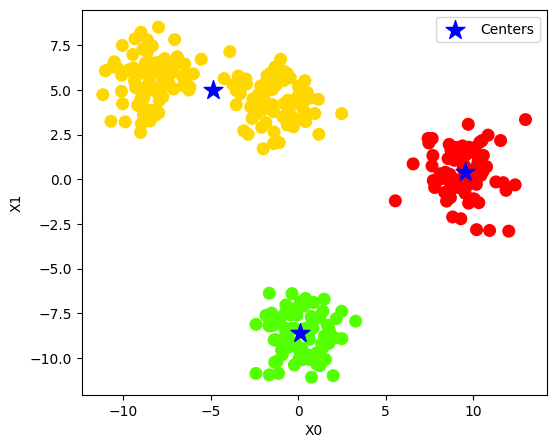

In [61]:
X, y= make_blobs(n_samples=310, centers=4, n_features=2, cluster_std=1.3, shuffle=True,random_state=7)

km = KMeans(n_clusters=3, init='random', n_init = 'auto', max_iter = 300, tol = 0.0001, random_state = 0)
km.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

print(km.inertia_)

994.3867528518538


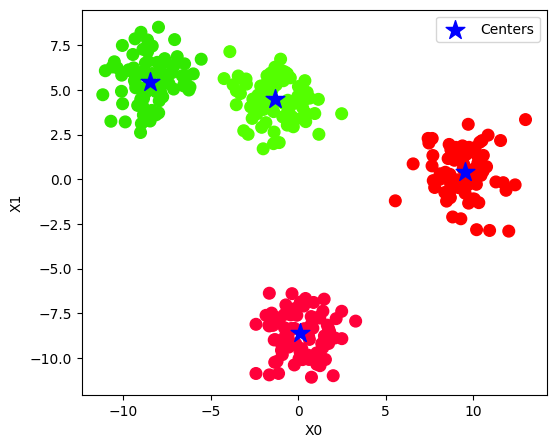

In [62]:
km = KMeans(n_clusters=4, init='random', n_init = 'auto', max_iter = 300, tol = 0.0001, random_state = 0)
km.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

print(km.inertia_)

### Zad 3

395.8197818672736


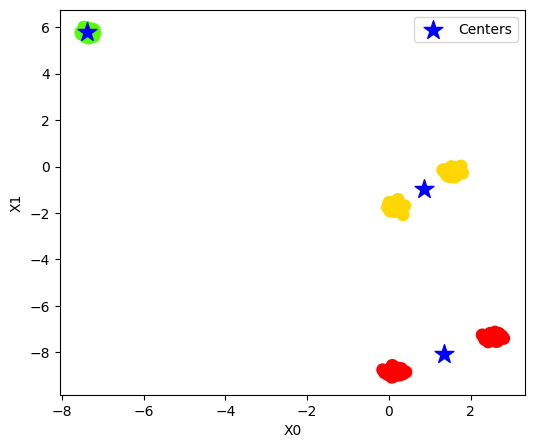

In [63]:
X, y= make_blobs(n_samples=310, centers=5, n_features=2, cluster_std=0.1, shuffle=True, random_state=125)

km = KMeans(n_clusters=3, init='random', n_init = 'auto', max_iter = 300, tol = 0.0001, random_state = 0)
km.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

print(km.inertia_)

395.8197818672736


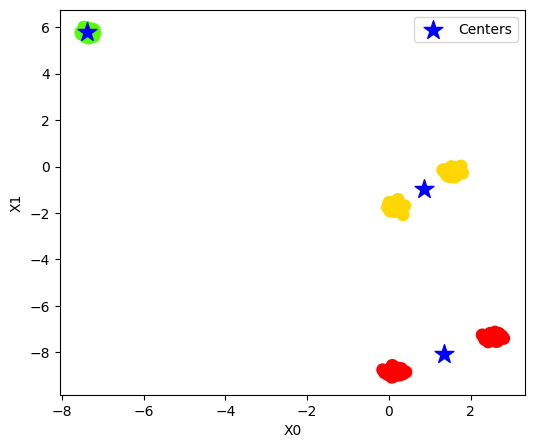

In [64]:
km = KMeans(n_clusters=3, init='k-means++', n_init = 'auto', max_iter = 300, tol = 0.0001, random_state = 0)
km.fit_predict(X, y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

print(km.inertia_)

### Zad 4

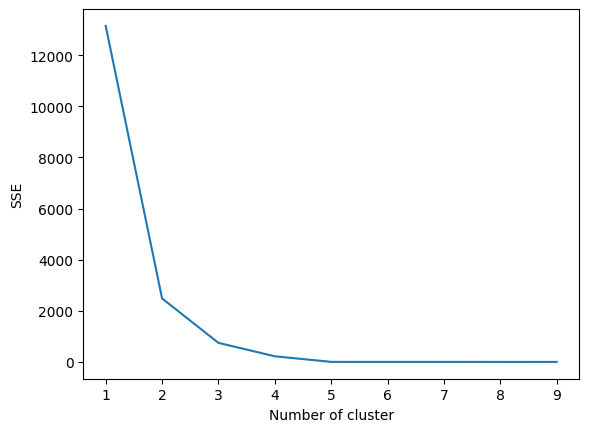

In [65]:
X, y= make_blobs(n_samples=410, centers=5, n_features=2, cluster_std=0.1, shuffle=True, random_state=124)

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit_transform(X, y)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# plt.figure(figsize=(6,5))
# plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
# plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
#             color='blue', label='Centers')
# plt.legend(loc='best')
# plt.xlabel('X0')
# plt.ylabel('X1')

### Zad 5

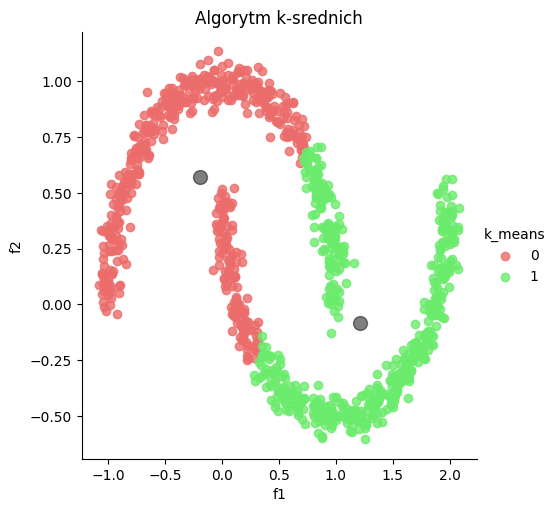

In [66]:
from sklearn.datasets import make_moons
import seaborn as sns
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])
#metoda klasteryzacji
# km -model KMeans
#y_km - wynik predykcji
k = 2;
kmeans = KMeans(n_clusters=k, max_iter=1000)
y_km = kmeans.fit_predict(X_moon, y)
 
#wykres
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=100, alpha=0.5)
plt.show()

## Cz 2
### Współczynnik profilu 

For n_clusters = 2 The average silhouette_score is : 0.6338662884971418
For n_clusters = 3 The average silhouette_score is : 0.6338662884971418
For n_clusters = 4 The average silhouette_score is : 0.6338662884971418
For n_clusters = 5 The average silhouette_score is : 0.6338662884971418
For n_clusters = 6 The average silhouette_score is : 0.6338662884971418


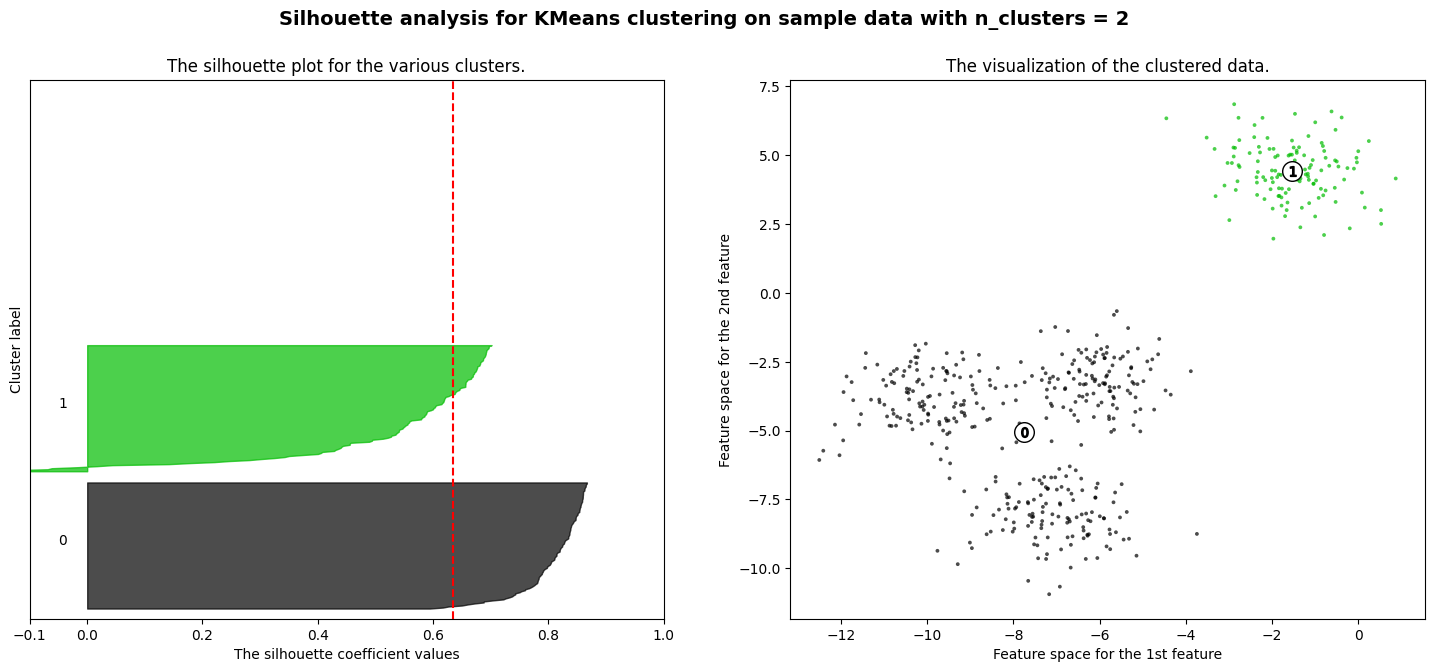

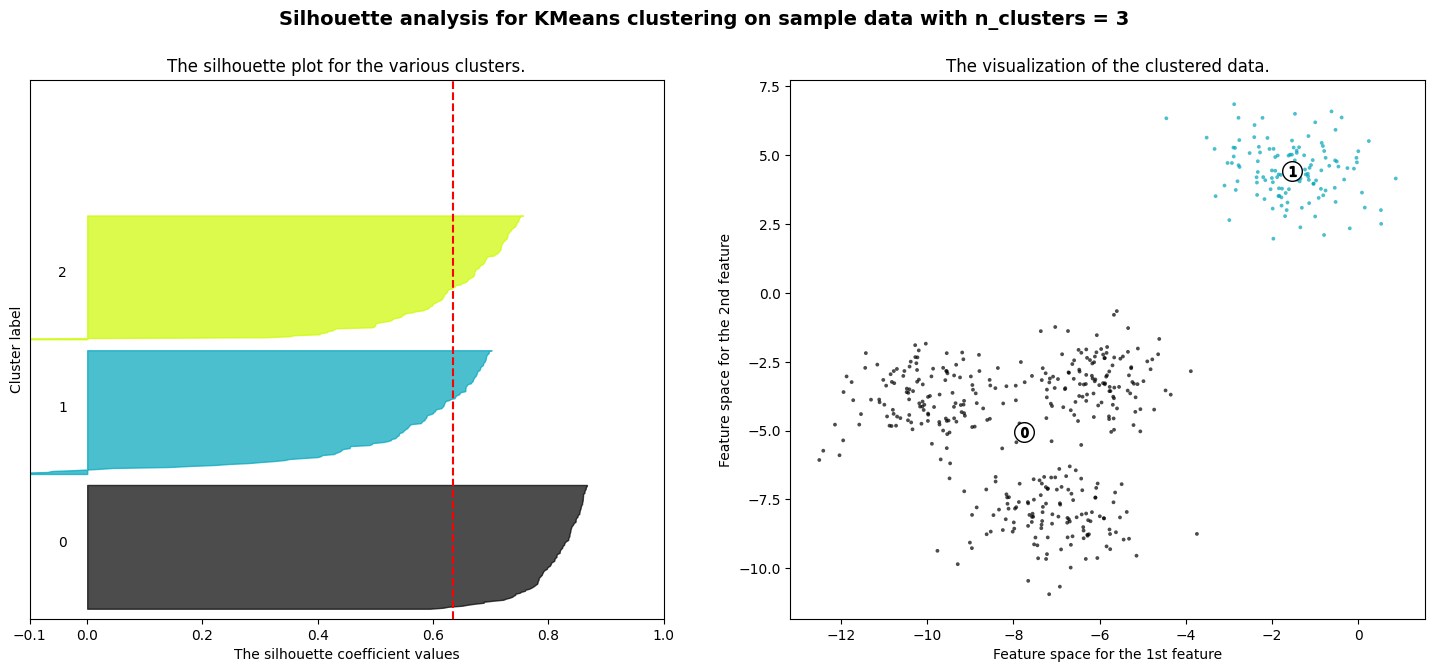

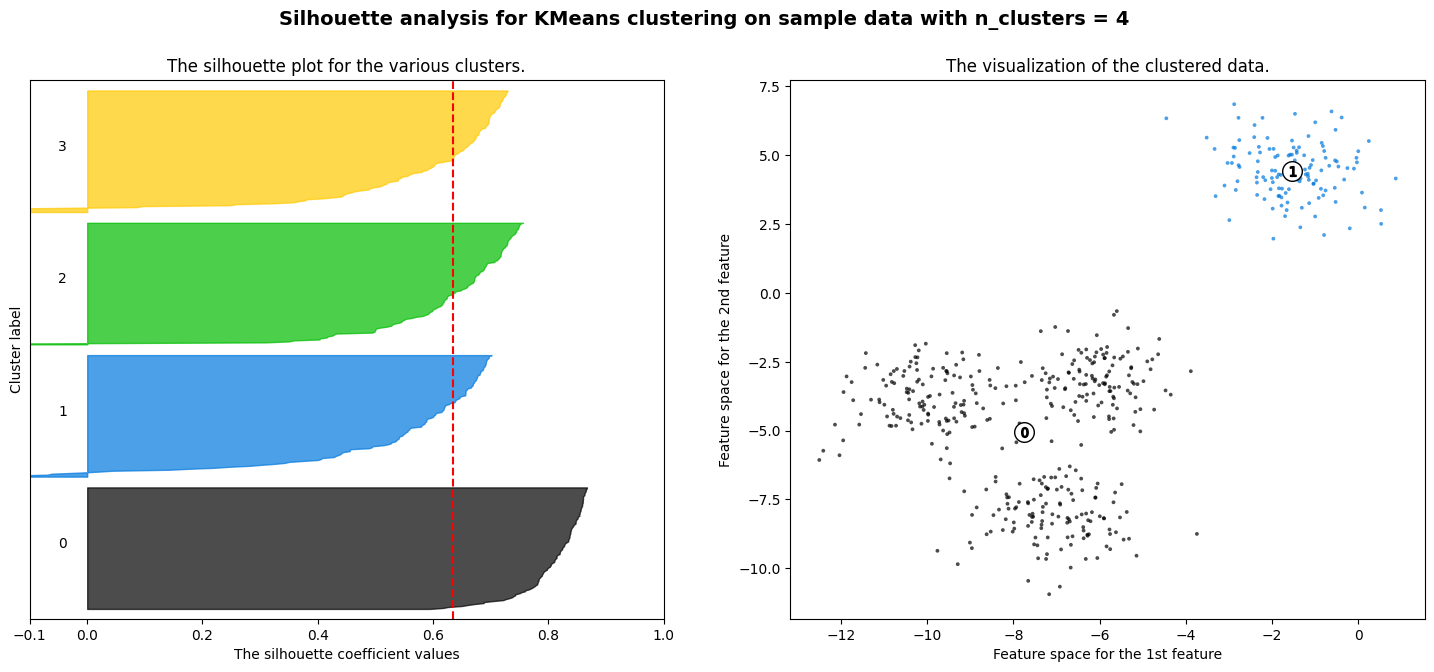

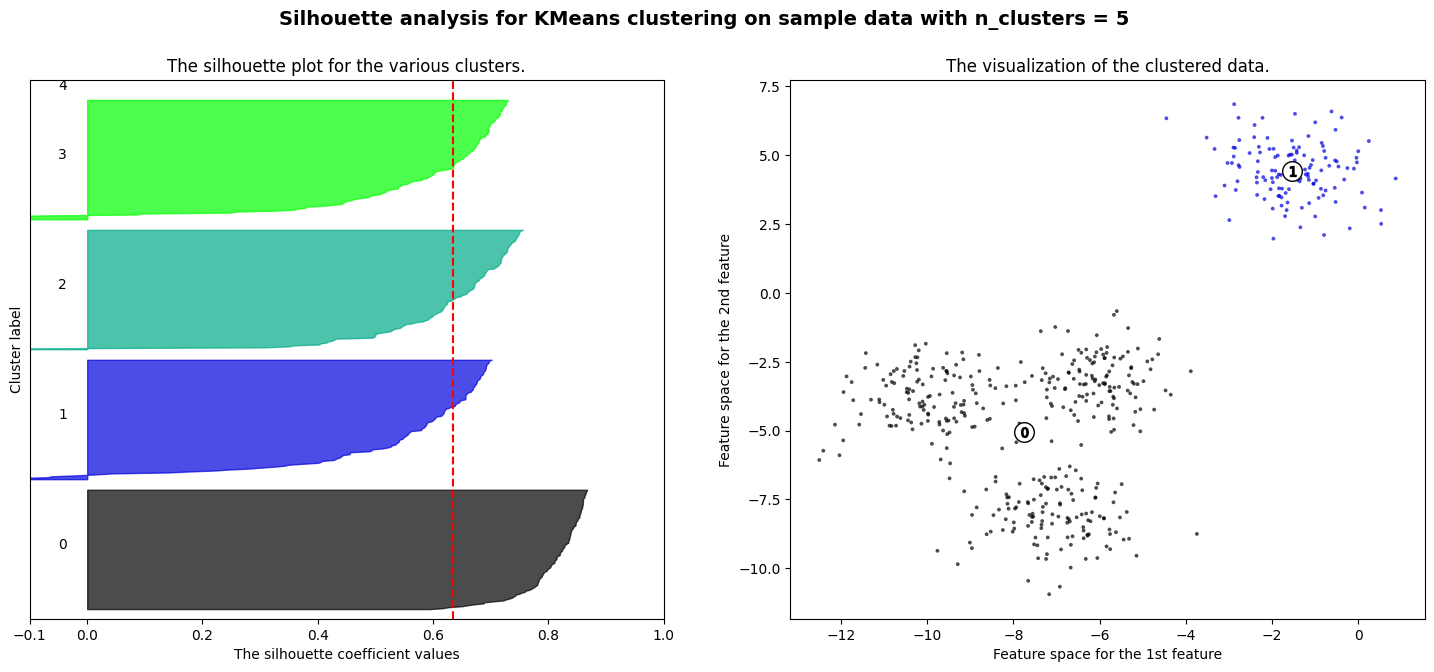

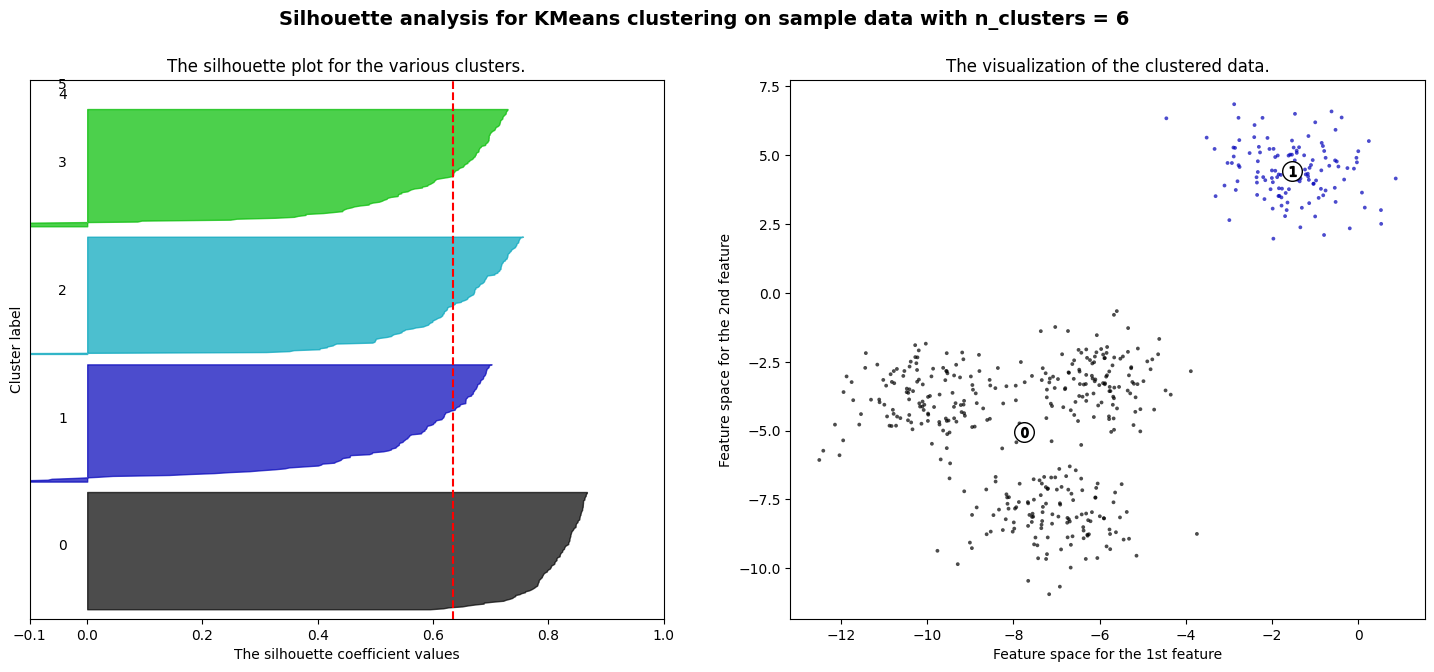

In [67]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
 
 
# Generowanie danych
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
# Wybór liczby skupień celem porównania 
range_n_clusters = [2, 3, 4, 5, 6]
 
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
 
    # Proszę stworzyć model klasy KMeans z liczbą klastrówn_clusters oraz losową liczbą wstępnych centroidów random_state=10
 
    clusterer = KMeans(n_clusters=k, max_iter=1000, random_state=10)
   # Naucz model - wynik predykcji
    cluster_labels = clusterer.fit_predict(X, y)
 
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, y)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # Wyznacz współczynnik profilu dla każdego przypadku wykorzystując funkcję silhouette_samples
    sample_silhouette_values = silhouette_samples(X, y)
 
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[y == i]
 
        ith_cluster_silhouette_values.sort()
 
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
 
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
 
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
 
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
 
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
 
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
 
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
 
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

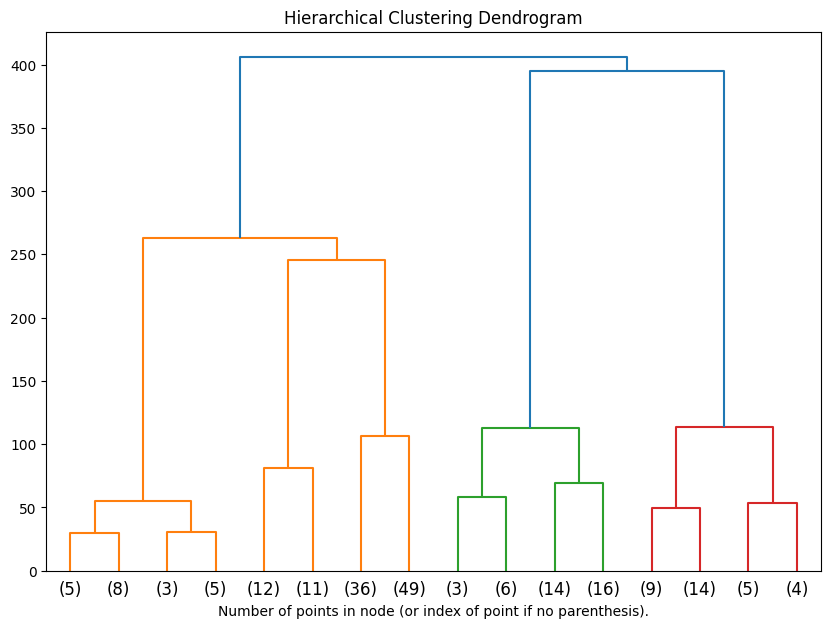

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


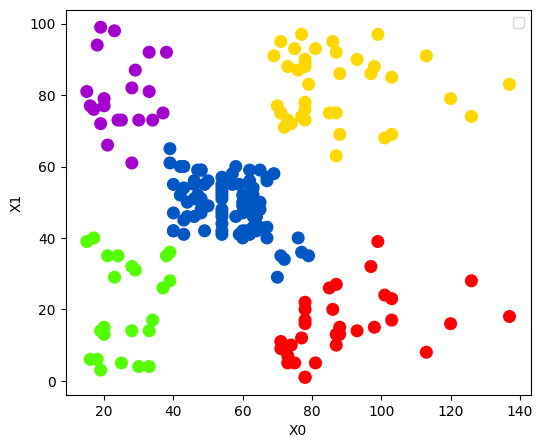

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(linkage_matrix, **kwargs):
    dendrogram(linkage_matrix, **kwargs)

path = os.getcwd() + '/shopping_data.csv'
customer_data = pd.read_csv(path)

data = customer_data.iloc[:, 3:5].values

# Perform hierarchical clustering and get the linkage matrix
linkage_matrix = linkage(data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
plot_dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Scatter plot of the data points colored by their cluster labels
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clustering.fit(data)

plt.figure(figsize=(6,5))
plt.scatter(data[:, 0], data[:, 1], s=70, c=clustering.labels_, cmap=plt.cm.prism)
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()
